In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# digits classification

## load digits images

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### check sample image in data

8


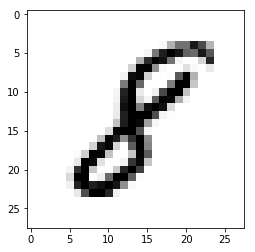

In [4]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

### reshape images to train neural network

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### train digit classification model

In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

model.evaluate(x_test, y_test)

Using TensorFlow backend.
W0103 14:07:04.673645 34400 deprecation_wrapper.py:119] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0103 14:07:04.807583 34400 deprecation_wrapper.py:119] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0103 14:07:04.900765 34400 deprecation_wrapper.py:119] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0103 14:07:04.979453 34400 deprecation_wrapper.py:119] From C:\Users\abhinav.jhanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:

Epoch 1/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.1991 - acc: 0.9395
Epoch 2/10
60000/60000 [==============================] - 34s 567us/step - loss: 0.0798 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 34s 559us/step - loss: 0.0566 - acc: 0.9823
Epoch 4/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.0425 - acc: 0.9860
Epoch 5/10
60000/60000 [==============================] - 34s 560us/step - loss: 0.0340 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0287 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0245 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 32s 541us/step - loss: 0.0217 - acc: 0.9924
Epoch 9/10
60000/60000 [==============================] - 34s 564us/step - loss: 0.0178 - acc: 0.9938
Epoch 10/10
10000/10000 [==============================] - 1s 111us/step


[0.06054463841525212, 0.9855]

### save digits classification model

In [8]:
import _pickle as pickle
pickle_out = open('digits.pickle', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

### load digits classification model

In [10]:
import _pickle as pickle
pickle_in = open('digits.pickle', 'rb')
model = pickle.load(pickle_in)
pickle_in.close()

### make sample prediction

9


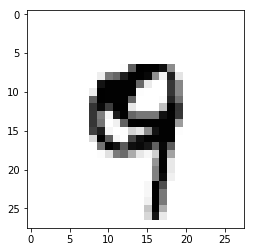

In [11]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

# digits segmentation and classification

In [12]:
import cv2
import imutils
import numpy as np

In [60]:
def x_cord_contour(contour):
    # This function take a contour from findContours
    # it then outputs the x centroid coordinates
    M = cv2.moments(contour)
    return (int(M['m10']/M['m00']))

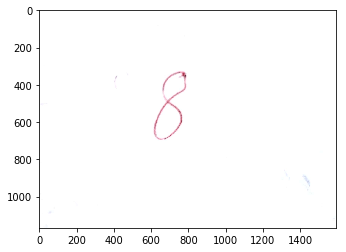

In [70]:
# load image
#image = cv2.imread('89.jpg')
image = cv2.imread('8.jpg')
plt.imshow(image)

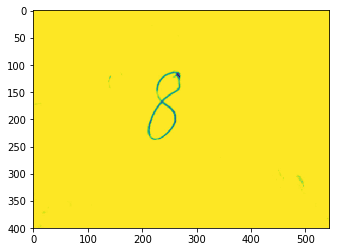

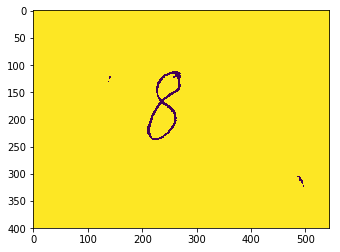

In [71]:
# resize
image = imutils.resize(image, height=400)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

# extract
thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)
plt.show()

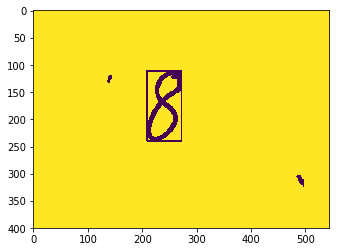

In [74]:
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
output = thresh.copy()
samples = []
# loop over the contours
for c, hier in zip(cnts, hierarchy[0]):
    #print(hier)
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    if hier[3]==0:
        cv2.drawContours(output, [c], -1, (0, 0, 255), 2)
        
        # extract contour rectangle boundary
        x, y, w, h = cv2.boundingRect(c)
        if w>20 and h>100:
            cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 0), 2)
            samples.append(thresh[y:y+h, x:x+w])
plt.imshow(output)

In [75]:
for index, im in enumerate(samples):
    #plt.title('Initial Image '+str(index))
    #plt.imshow(im)
    #plt.show()
    
    # resize contour to height=28
    im = imutils.resize(im, height=28)
    # add white pixel around the image to convert it into a square
    # 50>> depends on how much area to be covered by number; higher this value lesser space covered by number
    delta_w = 50 - im.shape[1]
    delta_h = 50 - im.shape[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)           
    color = [255]
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    # resize to 28x28 pixel to be fed to neural network
    im = cv2.resize(im, (28,28))
    
    #plt.title('Modified Image '+str(index))
    #plt.imshow(im)
    #plt.show()
    samples[index] = cv2.threshold(im, 240, 255, cv2.THRESH_BINARY_INV)[1]
    #plt.imshow(samples[index])
    #plt.show()
    pred = model.predict(samples[index].reshape(1, 28, 28, 1))
    print(pred.argmax())


8


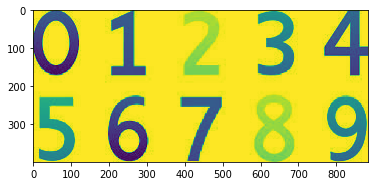

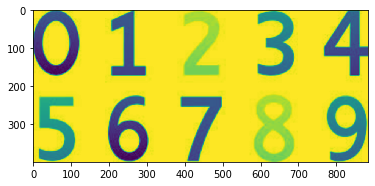

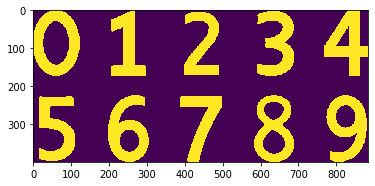

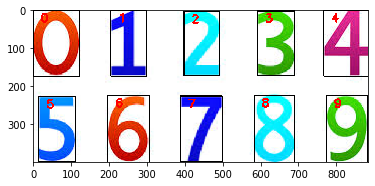

In [88]:
# load image
image = cv2.imread('sample6.jfif')

# resize
image = imutils.resize(image, height=400)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

# remove noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)
plt.show()

# extract
thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)
plt.show()

cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# sort as per centroid
cnts = sorted(cnts, key=x_cord_contour, reverse=False)

output = image.copy()
# loop over the contours
for c in cnts:
    #cv2.drawContours(output, [c], -1, (0, 0, 255), 1)
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    #cv2.drawContours(output, [c], -1, (0, 0, 255), 2)
            
    # extract contour rectangle boundary
    x, y, w, h = cv2.boundingRect(c)
    #print(w,h)
    if h>90:
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 0), 2)
        roi = thresh[y:y+h, x:x+w]
        im = imutils.resize(roi, height=28)
        delta_w = 50 - im.shape[1]
        delta_h = 50 - im.shape[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)           
        color = [0]
        im = cv2.resize(cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color), (28,28))
        pred = model.predict(im.reshape(1, 28, 28, 1))
        cv2.putText(output, str(pred.argmax()), (x+20, y+30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)

plt.imshow(output)
plt.show()

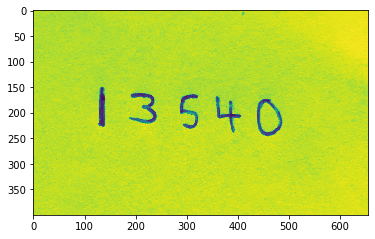

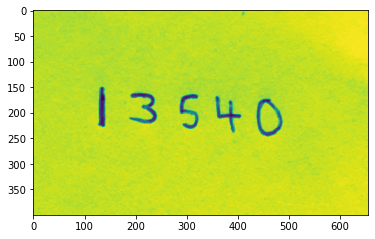

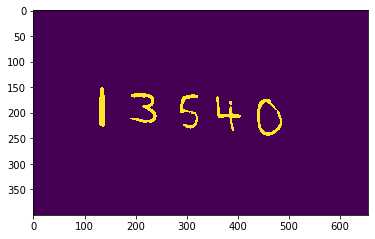

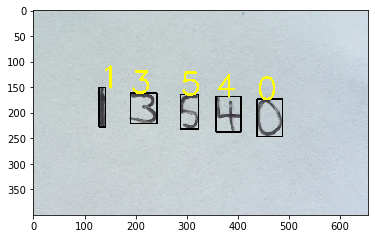

In [93]:
# load image
image = cv2.imread('numbers.jpg')

# resize
image = imutils.resize(image, height=400)

# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

# remove noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred)
plt.show()

# extract
thresh = cv2.threshold(blurred, 140, 255, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh)
plt.show()

cnts, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=x_cord_contour, reverse=False)

output = image.copy()

# loop over the contours
for c in cnts:
    #cv2.drawContours(output, [c], -1, (255, 0, 0), 2)
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    # extract contour rectangle boundary
    x, y, w, h = cv2.boundingRect(c)
    #print(w,h)
    if h>20:
        #cv2.drawContours(output, [c], -1, (255, 0, 0), 2)
        roi = thresh[y:y + h, x:x + w]
        cv2.rectangle(output, (x, y), (x + w, y + h), (0, 0, 0), 2)
        
        im = imutils.resize(roi, height=28)
        delta_w = 50 - im.shape[1]
        delta_h = 50 - im.shape[0]
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)           
        color = [0]
        im = cv2.resize(cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color), (28,28))
        #plt.imshow(im)
        #plt.show()
        
        pred = model.predict(im.reshape(1, 28, 28, 1))
        cv2.putText(output, str(pred.argmax()), (x, y), 
        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 0), 3)

plt.imshow(output)
plt.show()